# Introduction 

Forecasting stock price after January 2019 using FBProphet model



In [ ]:
!kaggle datasets download -d caesarmario/bank-negara-indonesia-stock-historical-price

In [2]:
!unzip bank-negara-indonesia-stock-historical-price.zip -d data_input

Archive:  bank-negara-indonesia-stock-historical-price.zip
  inflating: data_input/BBNI.JK.csv  
  inflating: data_input/BBNI.JK_monthly.csv  
  inflating: data_input/BBNI.JK_weekly.csv  


# Library and Setup

In [106]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

we will be using provided data from kaggle platform. its about the historical stock price of BNI

In [107]:
df = pd.read_csv('data_input/BBNI.JK.csv')
df.head()

Date    Open    High     Low   Close    Adj Close    Volume
0  2019-01-01  4400.0  4400.0  4400.0  4400.0  3436.901367         0
1  2019-01-02  4400.0  4400.0  4337.5  4362.5  3407.609619  15681200
2  2019-01-03  4337.5  4387.5  4325.0  4362.5  3407.609619  21416600
3  2019-01-04  4362.5  4400.0  4337.5  4362.5  3407.609619  41078600
4  2019-01-07  4412.5  4462.5  4412.5  4437.5  3466.193115  48108200

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1242 non-null   object 
 1   Open       1242 non-null   float64
 2   High       1242 non-null   float64
 3   Low        1242 non-null   float64
 4   Close      1242 non-null   float64
 5   Adj Close  1242 non-null   float64
 6   Volume     1242 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.0+ KB


# Data Preprocessing

Time series data are collected at regular time interval, so we need to convert the date into datetime64. we dont need to sort the date because its already sorted by ascending

In [109]:
# change the date format

df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1242 non-null   datetime64[ns]
 1   Open       1242 non-null   float64       
 2   High       1242 non-null   float64       
 3   Low        1242 non-null   float64       
 4   Close      1242 non-null   float64       
 5   Adj Close  1242 non-null   float64       
 6   Volume     1242 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.0 KB


In [110]:
# see the missing values

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [111]:
# show the values from the volume that contain 0 
df[df['Volume'] == 0]


Date    Open    High     Low   Close    Adj Close  Volume
0    2019-01-01  4400.0  4400.0  4400.0  4400.0  3436.901367       0
25   2019-02-05  4562.5  4562.5  4562.5  4562.5  3563.832275       0
47   2019-03-07  4400.0  4400.0  4400.0  4400.0  3436.901367       0
66   2019-04-03  4737.5  4737.5  4737.5  4737.5  3700.526855       0
76   2019-04-17  4850.0  4850.0  4850.0  4850.0  3788.402100       0
78   2019-04-19  4925.0  4925.0  4925.0  4925.0  3846.985352       0
86   2019-05-01  4800.0  4800.0  4800.0  4800.0  3749.346436       0
107  2019-05-30  4075.0  4075.0  4075.0  4075.0  3339.359863       0
109  2019-06-03  4200.0  4200.0  4200.0  4200.0  3441.794189       0
110  2019-06-04  4200.0  4200.0  4200.0  4200.0  3441.794189       0
111  2019-06-05  4200.0  4200.0  4200.0  4200.0  3441.794189       0
112  2019-06-06  4200.0  4200.0  4200.0  4200.0  3441.794189       0
113  2019-06-07  4200.0  4200.0  4200.0  4200.0  3441.794189       0
309  2020-03-13  2512.5  2512.5  2512.5  2512.5  2187.364258       0
1241 2024-01-15  5600.0  5600.0  5600.0  5600.0  5600.000000       0

In [112]:
# show the date value min and max

print(df['Date'].min())
print(df['Date'].max())

2019-01-01 00:00:00
2024-01-15 00:00:00


we can perform a brief observastion using visualization

/home/abhinowo/Documents/LearningProject/PythonDataAnalytics/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



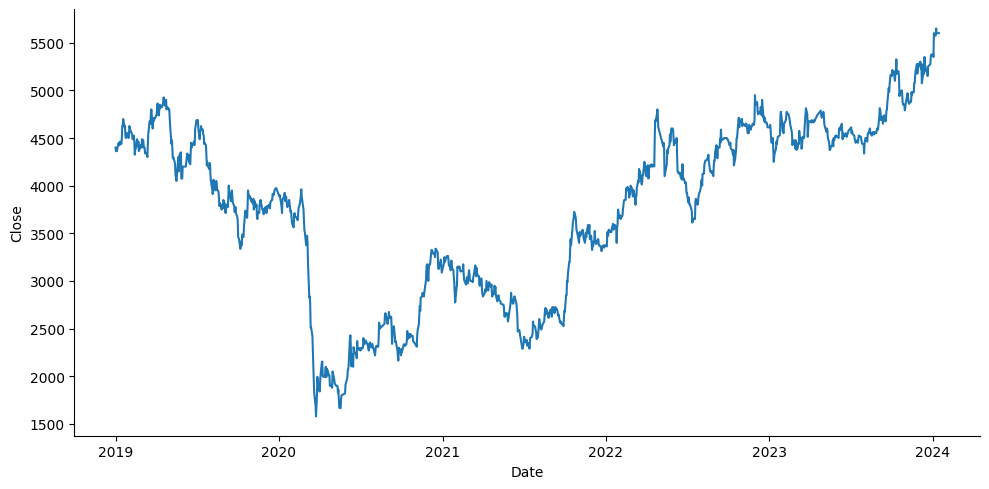

In [113]:
# data visualization

sns.relplot(x='Date', y='Close', data=df, kind='line', height=5, aspect=2)
plt.show()

# we use y as the close value because we want to predict the close value in the future

In [114]:
# fb prohphet implementation

from prophet import Prophet

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. 

In [115]:
daily_end = df[['Date', 'Close']].rename(columns={'Date':'ds', 'Close':'y'})

daily_end.head()

ds       y
0 2019-01-01  4400.0
1 2019-01-02  4362.5
2 2019-01-03  4362.5
3 2019-01-04  4362.5
4 2019-01-07  4437.5

In [116]:
model = Prophet()
model.fit(daily_end)

10:44:49 - cmdstanpy - INFO - Chain [1] start processing


10:44:49 - cmdstanpy - INFO - Chain [1] done processing


perform forecast for 1 years (2025)

In [153]:
# forecasting 

future = model.make_future_dataframe(periods=365, freq='D')
future.tail()

ds
1602 2025-01-10
1603 2025-01-11
1604 2025-01-12
1605 2025-01-13
1606 2025-01-14

The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [118]:
forecast = model.predict(future)
forecast[['ds', 'trend', 'weekly', 'yearly', 'yhat']].tail()

ds        trend     weekly      yearly         yhat
1602 2025-01-10  5655.492647  -3.807367  269.637392  5921.322672
1603 2025-01-11  5657.090453  28.204458  267.766403  5953.061314
1604 2025-01-12  5658.688258  28.204466  265.185736  5952.078461
1605 2025-01-13  5660.286064 -11.889801  261.961203  5910.357466
1606 2025-01-14  5661.883869 -12.941250  258.180580  5907.123199

The idea of GAM:

$Y(t) = T(t) + S(t) + E(t)$


In [119]:
forecast['trend'] + forecast['weekly'] + forecast['yearly']

0       4557.866034
1       4559.617108
2       4571.333375
3       4583.673484
4       4588.615036
           ...     
1602    5921.322672
1603    5953.061314
1604    5952.078461
1605    5910.357466
1606    5907.123199
Length: 1607, dtype: float64

In [120]:
forecast['yhat']

0       4557.866034
1       4559.617108
2       4571.333375
3       4583.673484
4       4588.615036
           ...     
1602    5921.322672
1603    5953.061314
1604    5952.078461
1605    5910.357466
1606    5907.123199
Name: yhat, Length: 1607, dtype: float64

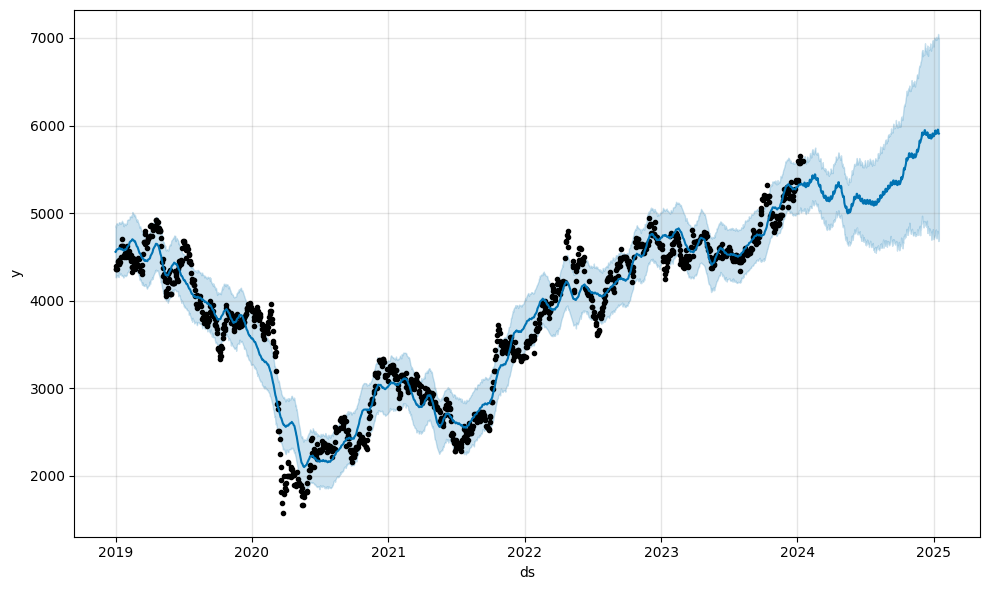

In [121]:
vis = model.plot(forecast)

theres still a lot of noise in the data, the blue line is the actual data and the black line is the prediction

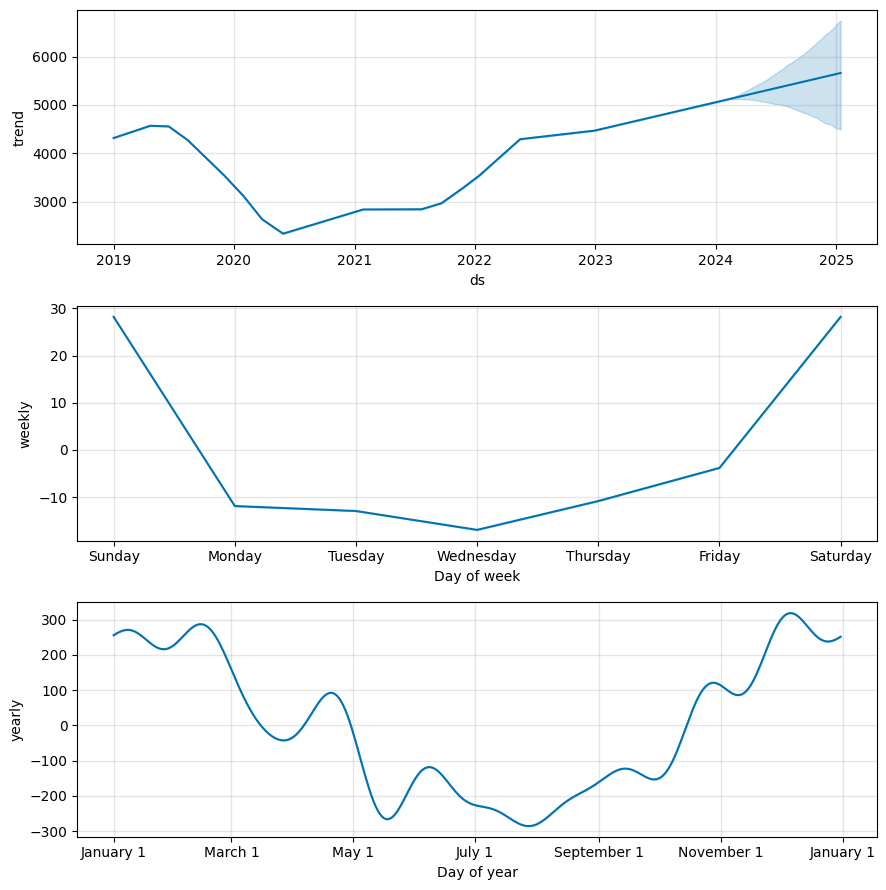

In [122]:
vis_2 = model.plot_components(forecast)

Insight:
- the trend over the year is actually increasing after 2021, getting a major drop down on 2019-2020 (probably bacause of covid19)
- friday is the day with the highest close value
- on monthly basis, the close value is the highest on december

In [123]:
# some information about the forecast, interactive

import plotly.express as px

fig = px.line(forecast, x='ds', y='yhat', title='Forecasting BBNI Stock Price')
fig.update_xaxes(rangeslider_visible=True)
fig.show()


In [124]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [125]:
# another interactive visualization
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

In [126]:
# visualiziation trend and seasonality (interactive)

plot_components_plotly(model, forecast)

You may have noticed in the earlier examples in this documentation that real time series frequently have abrupt changes in their trajectories. By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately. However, if you wish to have finer control over this process (e.g., Prophet missed a rate change, or is overfitting rate changes in the history), then there are several input arguments you can use

# Automatic changepoint detection in prophet

Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change. It then puts a sparse prior on the magnitudes of the rate changes (equivalent to L1 regularization) - this essentially means that Prophet has a large number of possible places where the rate can change, but will use as few of them as possible.

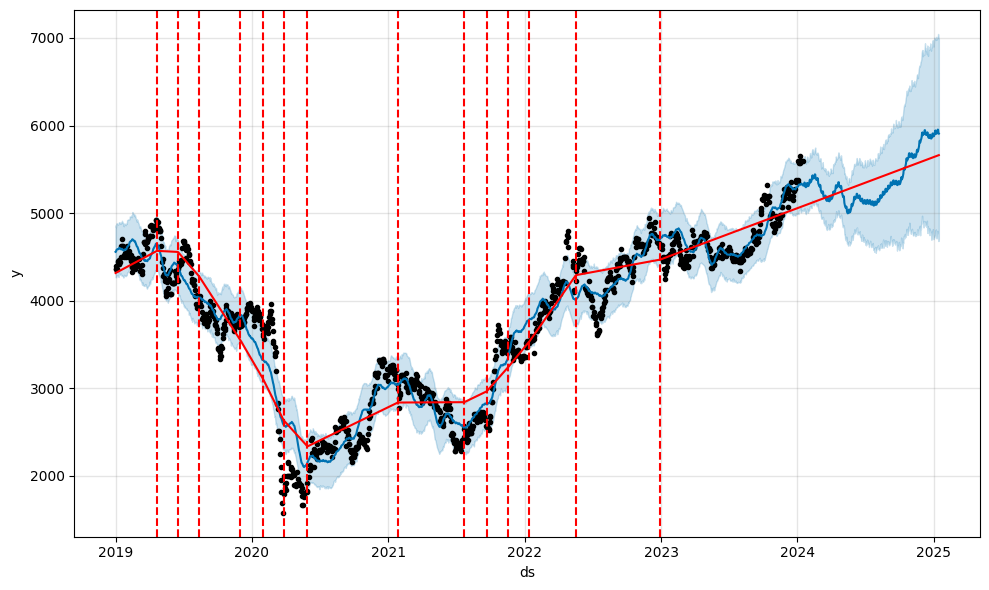

In [127]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)


By default changepoints are only inferred for the first 80% of the time series in order to have plenty of runway for projecting the trend forward and to avoid overfitting fluctuations at the end of the time series.

# Adjusting trend flexibility

10:45:00 - cmdstanpy - INFO - Chain [1] start processing


10:45:00 - cmdstanpy - INFO - Chain [1] done processing


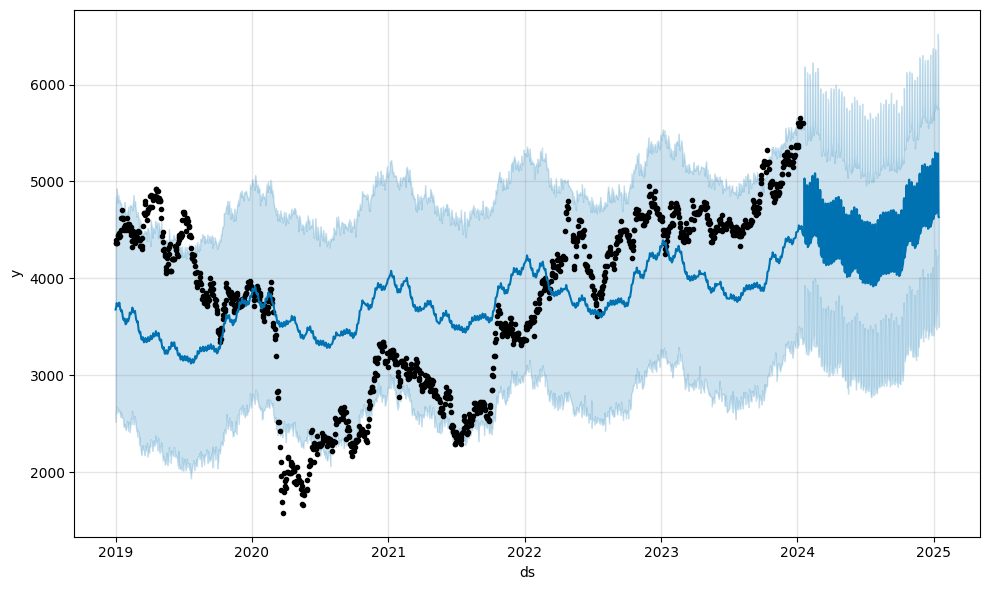

In [128]:
# making the changepoint prior scale smaller will make the trend less flexible
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(daily_end).predict(future)
fig = m.plot(forecast)

we dont need to use the the lower value

10:45:03 - cmdstanpy - INFO - Chain [1] start processing
10:45:03 - cmdstanpy - INFO - Chain [1] done processing


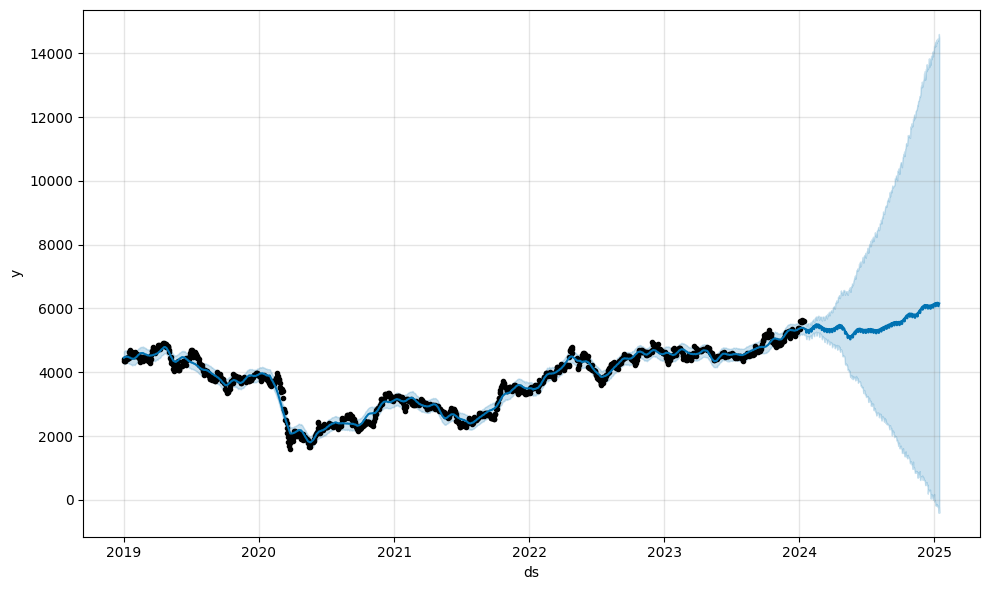

In [129]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(daily_end).predict(future)
fig = m.plot(forecast)

# Seasonality, Holiday Effects, And Regressors

In [130]:
# modelling holidays effect
# we want to see if the stock price is affected by the holidays

holidays = pd.DataFrame({
    'holiday': 'libur',
    'ds': pd.to_datetime(['2019-01-01', '2019-02-05', '2019-03-07', '2019-04-03', '2019-04-17', '2019-05-01', '2019-05-19', '2019-05-30', '2019-06-01', '2019-06-03', '2019-06-04', '2019-06-05', '2019-08-11', '2019-08-17', '2019-08-18', '2019-08-30', '2019-10-01', '2019-10-27', '2019-11-09', '2019-12-24', '2019-12-25', '2019-12-31', '2020-01-01', '2020-02-05', '2020-03-07', '2020-04-03', '2020-04-17', '2020-05-01', '2020-05-19', '2020-05-30', '2020-06-01', '2020-06-03', '2020-06-04', '2020-06-05', '2020-08-11', '2020-08-17', '2020-08-18', '2020-08-30', '2020-10-01', '2020-10-27', '2020-11-09', '2020-12-24', '2020-12-25', '2020-12-31', '2021-01-01', '2021-02-05', '2021-03-07', '2021-04-03', '2021-04-17', '2021-05-01', '2021-05-19', '2021-05-30', '2021-06-01', '2021-06-03', '2021-06-04', '2021-06-05', '2021-08-11', '2021-08-17', '2021-08-18', '2021-08-30', '2021-10-01', '2021-10-27', '2021-11-09', '2021-12-24', '2021-12-25', '2021-12-31', '2022-01-01', '2022-02-05', '2022-03-07', '2022-04-03', '2022-04-17', '2022-05-01', '2022-05-19', '2022-05-30', '2022-06-01', '2022-06-03', '2022-06-04', '2022-06-05', '2022-08-11', '2022-08-17', '2022-08-18', '2022-08-30', '2022-10-01', '2022-10-27', '2022-11-09', '2022-12-24', '2022-12-25', '2022-12-31', '2023-01-01', '2023-02-05', '2023-03-07', '2023-04-03', '2023-04-17', '2023-05-01', '2023-05-19', '2023-05-30', '2023-06-01', '2023-06-03', '2023-06-04', '2023-06-05', '2023-08-11', '2023-08-17', '2023-08-18', '2023-08-30', '2023-10-01', '2023-10-27', '2023-11-09', '2023-12-24', '2023-12-25', '2023-12-31', '2024-01-01', '2024-02-05', '2024-03-07', '2024-04-03', '2024-04-17', '2024-05-01', '2024-05-19', '2024-05-30', '2024-06-01', '2024-06-03', '2024-06-04', '2024-06-05', '2024-08-11', '2024-08-17', '2024-08-18', '2024-08-30', '2024-10-01', '2024-10-27', '2024-11-09', '2024-12-24', '2024-12-25', '2024-12-31'])
})

# Concatenate holidays dataframe with daily_end dataframe
daily_end = pd.concat([daily_end, holidays])


In [131]:
daily_end.head()

ds       y holiday
0 2019-01-01  4400.0     NaN
1 2019-01-02  4362.5     NaN
2 2019-01-03  4362.5     NaN
3 2019-01-04  4362.5     NaN
4 2019-01-07  4437.5     NaN

In [132]:
# check the holiday effect, 132 days are holiday from 2019 to 2024

daily_end[daily_end['holiday'] == 'libur']

ds   y holiday
0   2019-01-01 NaN   libur
1   2019-02-05 NaN   libur
2   2019-03-07 NaN   libur
3   2019-04-03 NaN   libur
4   2019-04-17 NaN   libur
..         ...  ..     ...
127 2024-10-27 NaN   libur
128 2024-11-09 NaN   libur
129 2024-12-24 NaN   libur
130 2024-12-25 NaN   libur
131 2024-12-31 NaN   libur

[132 rows x 3 columns]

In [133]:
# modelling holidays effect

model = Prophet(holidays=holidays) 
model.fit(daily_end)

10:45:08 - cmdstanpy - INFO - Chain [1] start processing
10:45:09 - cmdstanpy - INFO - Chain [1] done processing


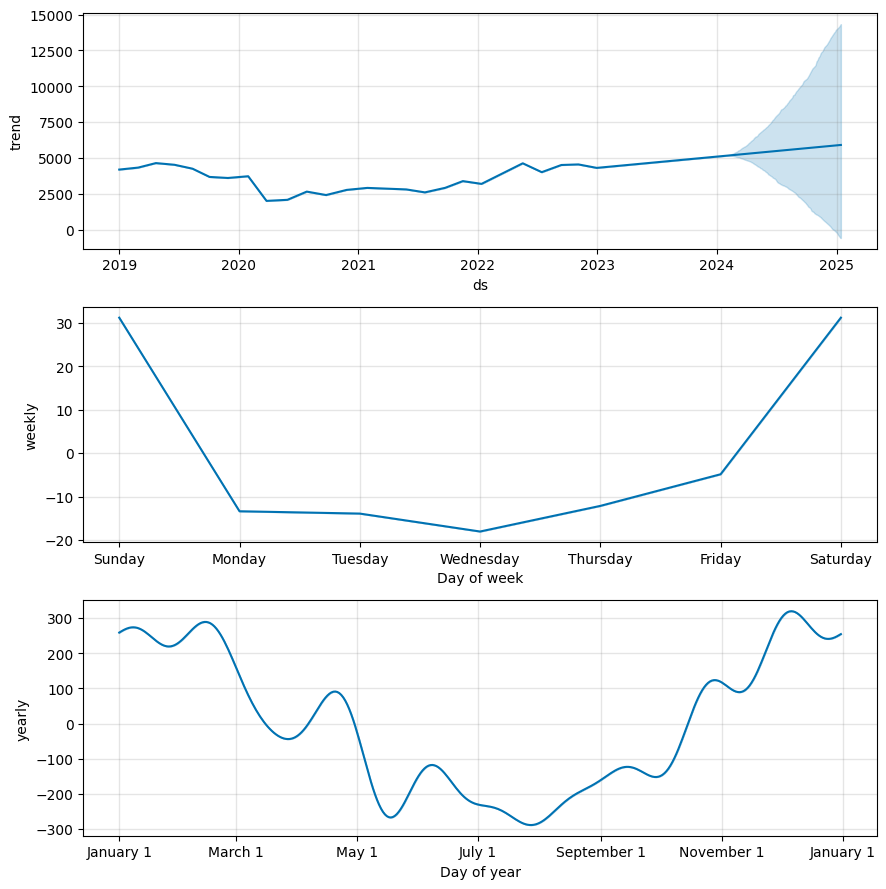

In [134]:
fig = model.plot_components(forecast)

as we can see the stock price actually doesnt  affected by the holidays effect by looking at the weekly and yearly terms.

In [135]:
 # built in country holidays effect

m = Prophet(holidays= holidays)
m.add_country_holidays(country_name='ID')
m.fit(daily_end)

10:45:13 - cmdstanpy - INFO - Chain [1] start processing
10:45:13 - cmdstanpy - INFO - Chain [1] done processing


In [136]:
m.train_holiday_names

0                                     libur
1                              Election Day
2                            New Year's Day
3                            Lunar New Year
4                            Day of Silence
5                               Good Friday
6                         Buddha's Birthday
7                   International Labor Day
8                             Ascension Day
9                             Pancasila Day
10                         Independence Day
11                            Christmas Day
12                              Eid al-Fitr
13                   Eid al-Fitr Second Day
14                              Eid al-Adha
15                         Islamic New Year
16                   The Prophet's Birthday
17                  The Prophet's Ascension
18     The Prophet's Birthday* (*estimated)
19             Lunar New Year* (*estimated)
20          Buddha's Birthday* (*estimated)
21                Eid al-Fitr* (*estimated)
22     Eid al-Fitr Second Day* (

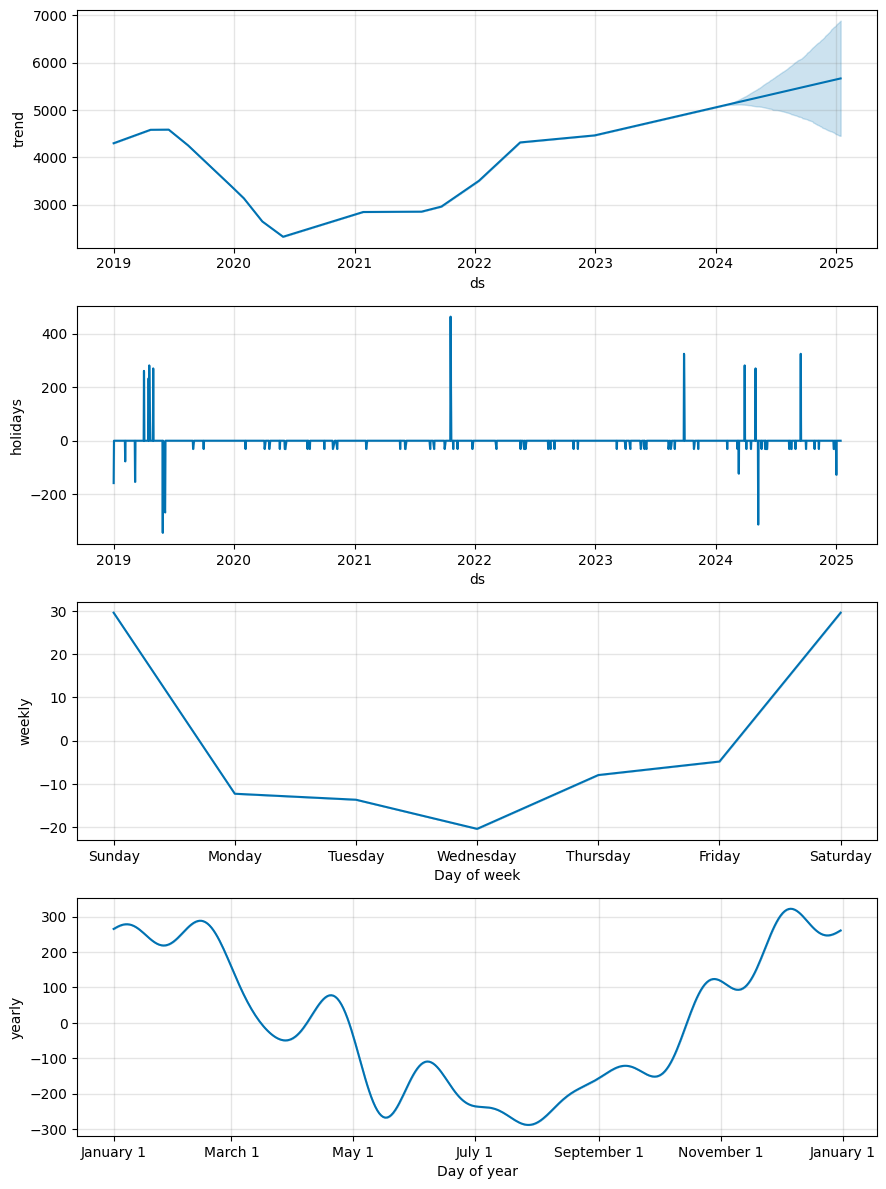

In [137]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

# Uncertainty Intervals

The biggest source of uncertainty in the forecast is the potential for future trend changes. The time series we have seen already in this documentation show clear trend changes in the history. Prophet is able to detect and fit these, but what trend changes should we expect moving forward? It’s impossible to know for sure, so we do the most reasonable thing we can, and we assume that the future will see similar trend changes as the history.

The width of the uncertainty intervals (by default 80%) can be set using the parameter interval_width:

In [142]:
# uncertainty in the trend

forecast = Prophet(interval_width=0.95).fit(daily_end).predict(future)

10:48:12 - cmdstanpy - INFO - Chain [1] start processing
10:48:12 - cmdstanpy - INFO - Chain [1] done processing


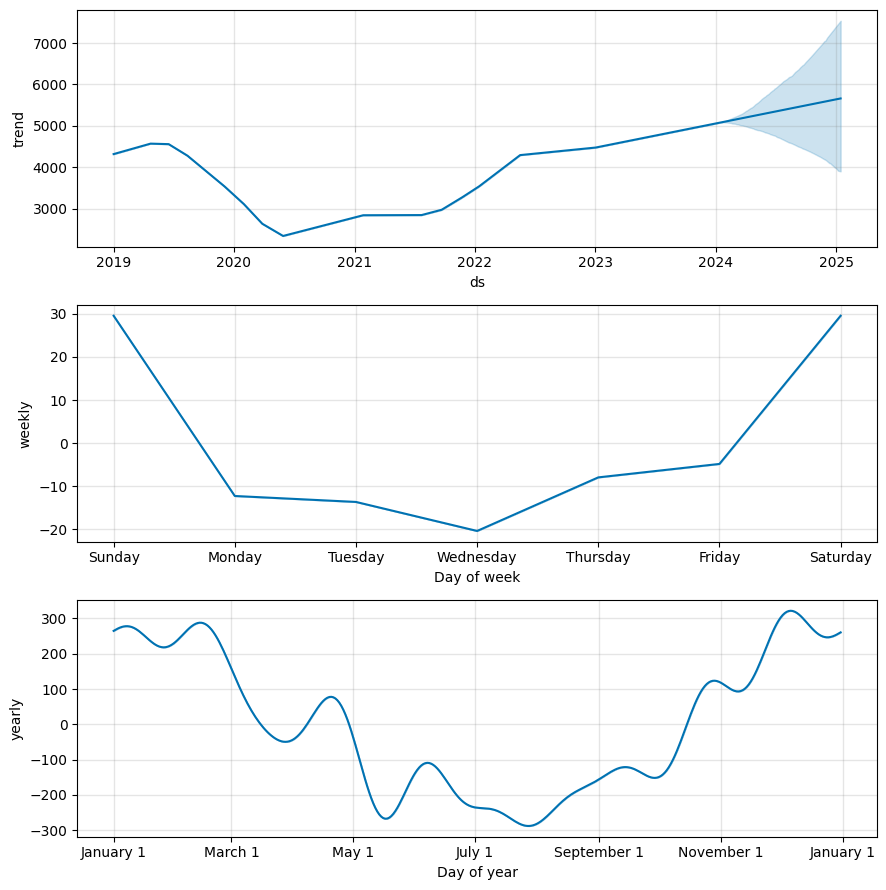

In [143]:
fig = m.plot_components(forecast)

# Outliers

10:52:02 - cmdstanpy - INFO - Chain [1] start processing
10:52:02 - cmdstanpy - INFO - Chain [1] done processing


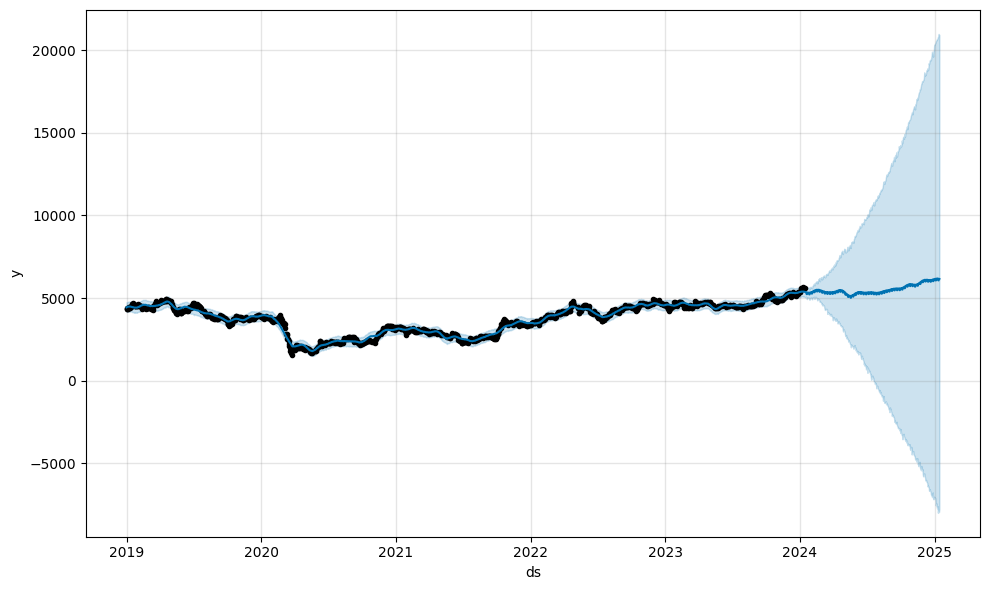

In [148]:
# apply all the model

m = Prophet(holidays=holidays, interval_width=0.95,changepoint_prior_scale=0.5)
forecast = m.fit(daily_end).predict(future)
fig = m.plot(forecast)

In [149]:
# show more detail about the forecast in the visualization

# yhat is the forecasted value
fig = m.plot_components(forecast)


ds         yhat   yhat_lower    yhat_upper
1602 2025-01-10  6187.136970 -7984.696632  20791.705742
1603 2025-01-11  6076.294091 -7793.558189  20828.366075
1604 2025-01-12  6072.903748 -7922.007754  20983.258165
1605 2025-01-13  6168.278632 -7947.946092  20933.937555
1606 2025-01-14  6164.003447 -7758.029948  20928.014711

In [156]:
# show all the 2025 forecast
forecast[forecast['ds'].dt.year == 2025]

# the data on 2025 is only 14 rows because this data being fetch in the last 14 january 2024

ds        trend   yhat_lower    yhat_upper  trend_lower  \
1593 2025-01-01  5884.441330 -7105.007527  20313.964646 -7357.592619   
1594 2025-01-02  5886.594405 -7079.099378  20386.401240 -7395.928262   
1595 2025-01-03  5888.747481 -7108.482309  20424.624745 -7465.277006   
1596 2025-01-04  5890.900556 -7536.045188  20489.225513 -7570.447342   
1597 2025-01-05  5893.053631 -7420.912898  20570.231799 -7675.617678   
1598 2025-01-06  5895.206707 -7404.382572  20579.799427 -7780.788013   
1599 2025-01-07  5897.359782 -7644.337393  20659.096235 -7874.089583   
1600 2025-01-08  5899.512858 -7715.019156  20649.462378 -7926.125932   
1601 2025-01-09  5901.665933 -7578.363871  20722.247883 -7978.162281   
1602 2025-01-10  5903.819008 -7984.696632  20791.705742 -8030.198630   
1603 2025-01-11  5905.972084 -7793.558189  20828.366075 -8082.234979   
1604 2025-01-12  5908.125159 -7922.007754  20983.258165 -8134.271327   
1605 2025-01-13  5910.278234 -7947.946092  20933.937555 -8186.001435   
1606 2025-01-14  5912.431310 -7758.029948  20928.014711 -8236.681472   

       trend_upper  additive_terms  additive_terms_lower  \
1593  19947.525867      265.218051            265.218051   
1594  20014.539346      274.103989            274.103989   
1595  20081.270130      284.389530            284.389530   
1596  20127.637155      178.824495            178.824495   
1597  20191.993792      180.838030            180.838030   
1598  20265.247156      281.521188            281.521188   
1599  20338.500520      282.236960            282.236960   
1600  20411.753884      277.782278            277.782278   
1601  20484.204080      280.122149            280.122149   
1602  20551.546877      283.317962            283.317962   
1603  20618.889673      170.322007            170.322007   
1604  20686.232470      164.778589            164.778589   
1605  20753.575266      258.000398            258.000398   
1606  20820.918063      251.572138            251.572138   

      additive_terms_upper  holidays  ...     weekly  weekly_lower  \
1593            265.218051       0.0  ...  24.647001     24.647001   
1594            274.103989       0.0  ...  29.308358     29.308358   
1595            284.389530       0.0  ...  35.957764     35.957764   
1596            178.824495       0.0  ... -72.499705    -72.499705   
1597            180.838030       0.0  ... -72.499589    -72.499589   
1598            281.521188       0.0  ...  27.160230     27.160230   
1599            282.236960       0.0  ...  27.925940     27.925940   
1600            277.782278       0.0  ...  24.647001     24.647001   
1601            280.122149       0.0  ...  29.308358     29.308358   
1602            283.317962       0.0  ...  35.957764     35.957764   
1603            170.322007       0.0  ... -72.499705    -72.499705   
1604            164.778589       0.0  ... -72.499589    -72.499589   
1605            258.000398       0.0  ...  27.160230     27.160230   
1606            251.572138       0.0  ...  27.925940     27.925940   

      weekly_upper      yearly  yearly_lower  yearly_upper  \
1593     24.647001  240.571050    240.571050    240.571050   
1594     29.308358  244.795631    244.795631    244.795631   
1595     35.957764  248.431766    248.431766    248.431766   
1596    -72.499705  251.324200    251.324200    251.324200   
1597    -72.499589  253.337618    253.337618    253.337618   
1598     27.160230  254.360958    254.360958    254.360958   
1599     27.925940  254.311020    254.311020    254.311020   
1600     24.647001  253.135277    253.135277    253.135277   
1601     29.308358  250.813791    250.813791    250.813791   
1602     35.957764  247.360198    247.360198    247.360198   
1603    -72.499705  242.821712    242.821712    242.821712   
1604    -72.499589  237.278178    237.278178    237.278178   
1605     27.160230  230.840168    230.840168    230.840168   
1606     27.925940  223.646198    223.646198    223.646198   

      multiplicative_terms  multiplicative_terms_

In [157]:
# show the forecasted value in 2025

forecast[forecast['ds'].dt.year == 2025]['yhat'].mean()

6143.65258867297

# Evaluation Metrics  

In [162]:
# implement evaluation metrics

from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/5 [00:00<?, ?it/s]

11:04:38 - cmdstanpy - INFO - Chain [1] start processing
11:04:38 - cmdstanpy - INFO - Chain [1] done processing
11:04:38 - cmdstanpy - INFO - Chain [1] start processing
11:04:38 - cmdstanpy - INFO - Chain [1] done processing
11:04:39 - cmdstanpy - INFO - Chain [1] start processing
11:04:39 - cmdstanpy - INFO - Chain [1] done processing
11:04:39 - cmdstanpy - INFO - Chain [1] start processing
11:04:39 - cmdstanpy - INFO - Chain [1] done processing
11:04:39 - cmdstanpy - INFO - Chain [1] start processing
11:04:40 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper       y     cutoff
0 2021-01-26  3059.651991  2899.555307  3214.978320  3037.5 2021-01-25
1 2021-01-27  3039.216023  2880.355194  3210.648379  2987.5 2021-01-25
2 2021-01-28  3021.824266  2854.798769  3189.127801  2887.5 2021-01-25
3 2021-01-29  3009.303418  2824.818547  3193.197590  2775.0 2021-01-25
4 2021-02-01  2928.141823  2734.331906  3107.637103  2925.0 2021-01-25

Insight: 
- cutoff is the date where the prediction is made
- yhat is the predicted value
- y is the actual value

In [163]:
# show the performance metrics

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon            mse        rmse         mae      mape     mdape  \
0 36 days  302015.853413  549.559690  461.789600  0.131570  0.124838   
1 37 days  320187.254347  565.850912  478.165610  0.136561  0.128265   
2 38 days  338265.280645  581.605778  493.718402  0.141070  0.134055   
3 39 days  345077.861626  587.433283  500.108154  0.143453  0.137566   
4 40 days  348773.746888  590.570696  504.913857  0.144787  0.139409   

      smape  coverage  
0  0.144598  0.420082  
1  0.150482  0.422131  
2  0.155860  0.430328  
3  0.158744  0.442623  
4  0.160322  0.454918

We see for this forecast that errors around 13% for predictions one month into the future

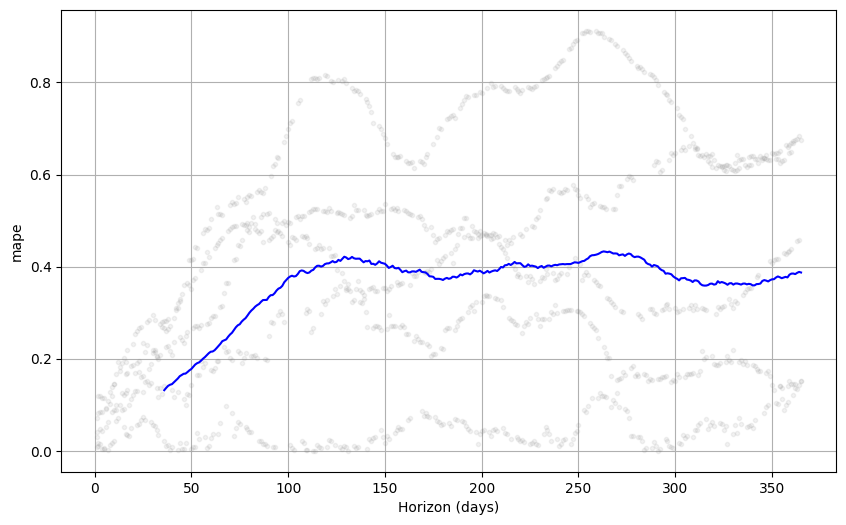

In [166]:
# visualize the performance metrics

from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')